## Импортируем необходимые библиотеки

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Читаем наш датасет, просматриваем первые 5 строк

In [72]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Размерность наших данных

In [73]:
df.shape

(891, 12)

## Строим график распределения пассажиров по их возрасту и полу

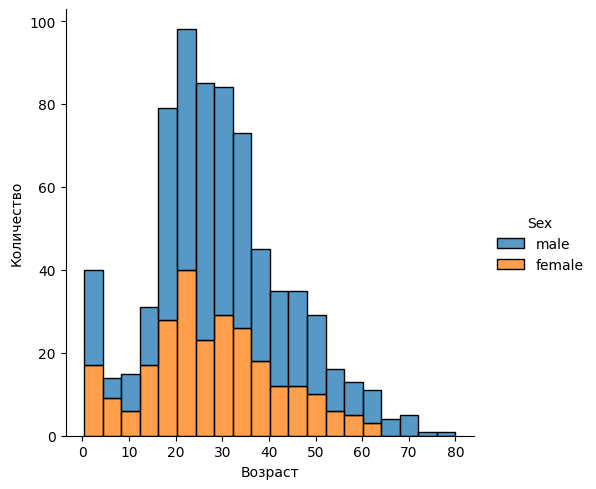

In [74]:
gph1 = sns.displot(data=df, x='Age', hue='Sex', multiple='stack')
gph1.set(xlabel='Возраст', ylabel='Количество')

## Узнаем количество выживших мужчин и женщин

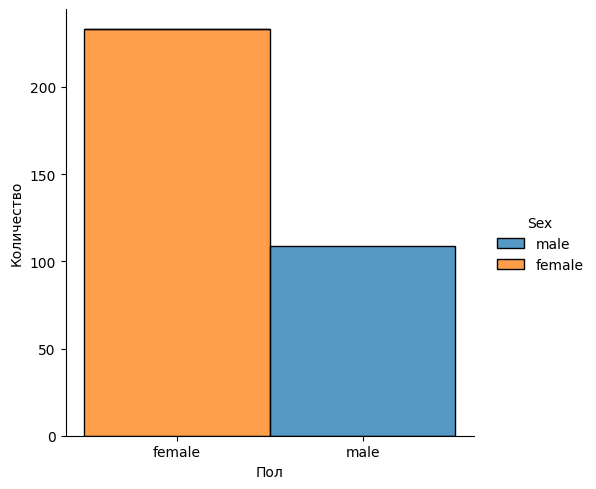

In [75]:
gph2 = sns.displot(data=df, x=df['Sex'].where(df['Survived'] == 1), hue='Sex', multiple='stack')
gph2.set(xlabel='Пол', ylabel='Количество')

In [76]:
df[['Sex', 'Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

## Теперь пройдемся по классам кают 

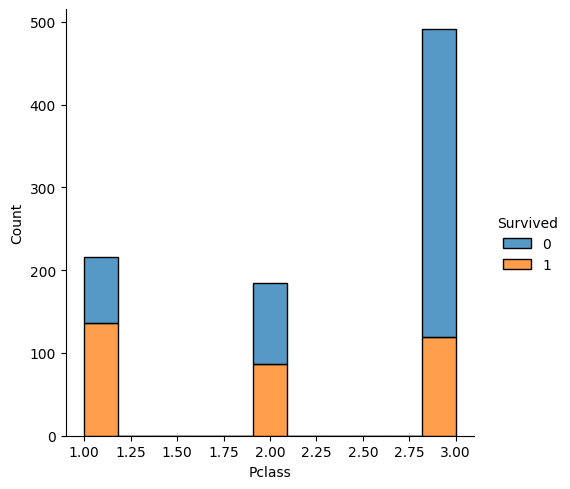

In [131]:
gph3 = sns.displot(data=df, x='Pclass', hue='Survived', multiple='stack')

In [99]:
for i in range(1,4):
    general_num = len(df[df['Pclass'] == i])
    survived_num = len(df.loc[(df['Pclass'] == i) & (df['Survived'] == 1)])
    print(f'Процент выживших пассажиров {i}-го класса: {round(survived_num * 100 / general_num, 2)}%')

Процент выживших пассажиров 1-го класса: 62.96%
Процент выживших пассажиров 2-го класса: 47.28%
Процент выживших пассажиров 3-го класса: 24.24%


Исходя из полученных выше данных, можно сделать вывод:

Каюты классом выше способствовали выживанию пассажиров. Возможно они были ближе расположены к спасательным шлюпкам, имели более прочную конструкцию, либо персонал корабля в первую очередь бежал на помощь именно к VIP-персонам.

## Пройдемся по портам и их прибыльности

In [165]:
portsWithClasses = df[['Embarked', 'Pclass','Fare']] \
                    .groupby(['Embarked', 'Pclass']) \
                    .agg({'Fare':sum, 'Pclass':'count'}) \
                    .rename(columns={'Pclass' : 'count', 'Fare' : 'FareTotal'}) \
                    .reset_index()
portsWithClasses

,Embarked,Pclass,FareTotal,count
0,C,1,8901.0750,85
1,C,2,431.0917,17
2,C,3,740.1295,66
3,Q,1,180.0000,2
4,Q,2,37.0500,3
5,Q,3,805.2043,72
6,S,1,8936.3375,127
7,S,2,3333.7000,164
8,S,3,5169.3613,353


### График доходов по билетам трёх классов с разных портов

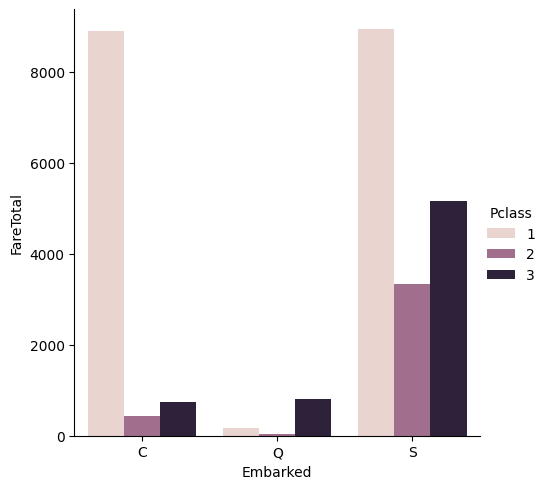

In [167]:
sns.catplot(data=portsWithClasses, x='Embarked', y='FareTotal', kind='bar', hue='Pclass')

### Суммарный доход с каждого порта

In [147]:
portsTotal = portsWithClasses[['Embarked', 'Fare']].groupby('Embarked').agg({'Fare':sum}).reset_index()
portsTotal

,Embarked,Fare
0,C,10072.2962
1,Q,1022.2543
2,S,17439.3988


### Гистограмма распределения купленных билетов в разных портах

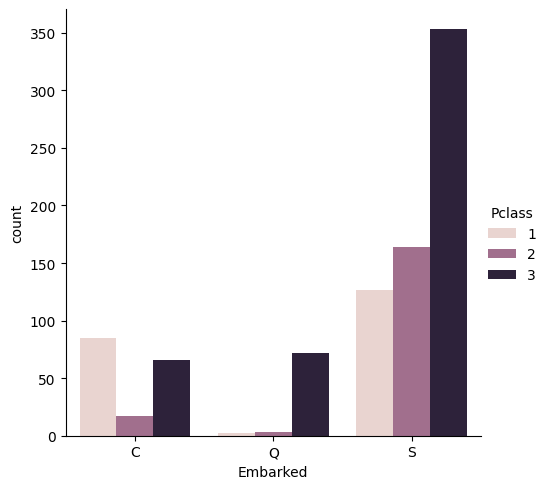

In [169]:
sns.catplot(data=portsWithClasses, x='Embarked', y='count', kind='bar', hue='Pclass')

Самым прибыльным портом оказался S - Southhampton. Суммарно пассажиры отдали за билеты в этом порту 17439$. \
Большую часть доходов принесли билеты в 1-й класс. \
1-й класс: 8936$\
2-й класс: 3333$\
3-й класс: 5169$\
Также порт S оказался абсолютным лидером по количеству посадок на борт пассажиров всех классов.

## Проверка закона Парето

### Правило Парето гласит, что лишь 20% покупателей дают вам 80% прибыли

In [170]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
distibution = df[['Pclass', 'Fare']].groupby('Pclass').agg({'Fare':sum, 'Pclass':'count'}).rename(columns={'Pclass':'count'}).reset_index()
distibution

,Pclass,Fare,count
0,1,18177.4125,216
1,2,3801.8417,184
2,3,6714.6951,491


In [189]:
revenue_perc = round(distibution[distibution['Pclass'] == 1]['Fare'][0] * 100 / distibution['Fare'].sum(), 2)
client_perc = round(distibution[distibution['Pclass'] == 1]['count'][0] * 100/ distibution['count'].sum(), 2)
print(f'Доля выручки от пассажиров 1-го класса: {revenue_perc}%')
print(f'Доля клиентов 1-го класса: {client_perc}%')

Доля выручки от пассажиров 1-го класса: 63.35%
Доля клиентов 1-го класса: 24.24%


### Pie Charts 

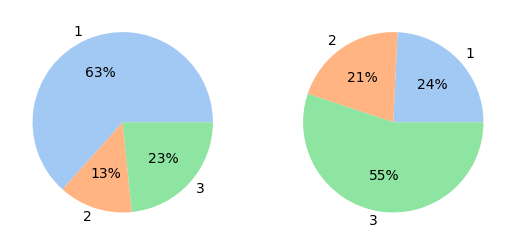

In [199]:
colors = sns.color_palette('pastel')[ 0:5 ]
plt.subplot(1,2,1)
plt.pie(distibution['Fare'], labels=distibution['Pclass'], colors = colors, autopct='%.0f%%')
plt.subplot(1,2,2)
plt.pie(distibution['count'], labels=distibution['Pclass'], colors = colors, autopct='%.0f%%')
plt.show()

Первая круговая диаграмма отображает долю каждого класса в итоговой выручке.\
Вторая - доля каждого класса в общем пассажиропотоке

#### В нашем случае закон Парето не подтвердился. 
#### Получились следующие результаты: 24% потребителей приносят 63% прибыли. Что, на самом деле, также является внушительным результатом